In [1]:
import pandas as pd
import numpy as np

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ketankarmase/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ketankarmase/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


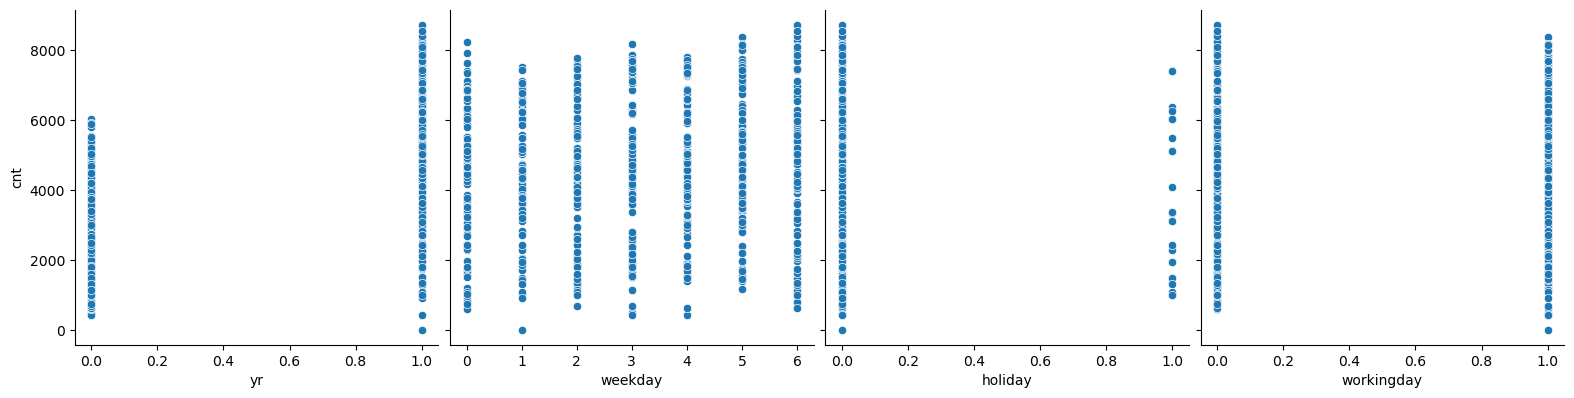

In [8]:
sns.pairplot(bike, x_vars= ['yr','weekday', 'holiday', 'workingday' ], y_vars='cnt', size=4, aspect=1, kind='scatter')
plt.show()

In [12]:
X= bike['yr']
y = bike ['cnt']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.head()

653    1
576    1
426    1
728    1
482    1
Name: yr, dtype: int64

In [15]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [16]:
import statsmodels.api as sm

In [17]:
X_train_sm = sm.add_constant(X_train)

In [18]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [19]:
lr.params

const    3314.557769
yr       2307.453814
dtype: float64

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.89e-49
Time:                        16:36:03   Log-Likelihood:                -4477.5
No. Observations:                 510   AIC:                             8959.
Df Residuals:                     508   BIC:                             8967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3314.5578     99.449     33.329      0.0

In [51]:
X= bike['registered']
y = bike ['cnt']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
X_train.head()

653    6612
576    6248
426    3110
728    1432
482    3100
Name: registered, dtype: int64

In [54]:
X_train_sm = sm.add_constant(X_train)

In [55]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [56]:
lr.params

const         211.798101
registered      1.171492
dtype: float64

In [77]:
print(lr.summary())

# As R-squared value is more in case of registered, its clear that registered users are using bike frequently. 
# We can introduce new plans to encourage them to take for longer subscription or if they are bringing new 
# members they will get benefit in there subscription. Such offers can be introduced

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.90e-68
Time:                        18:15:39   Log-Likelihood:                -4434.8
No. Observations:                 510   AIC:                             8874.
Df Residuals:                     508   BIC:                             8882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2863.6829    102.239     28.010      0.0

In [78]:
X= bike['workingday']
y = bike ['cnt']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const         4226.036364
workingday     384.859289
dtype: float64

In [80]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.367
Date:                Mon, 18 Mar 2024   Prob (F-statistic):             0.0371
Time:                        18:17:43   Log-Likelihood:                -4585.1
No. Observations:                 510   AIC:                             9174.
Df Residuals:                     508   BIC:                             9183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.0364    151.475     27.899      0.0

In [81]:
X= bike['holiday']
y = bike ['cnt']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      4516.649899
holiday   -1187.419130
dtype: float64

In [83]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.721
Date:                Mon, 18 Mar 2024   Prob (F-statistic):             0.0303
Time:                        18:18:33   Log-Likelihood:                -4584.9
No. Observations:                 510   AIC:                             9174.
Df Residuals:                     508   BIC:                             9182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4516.6499     87.248     51.768      0.0

In [84]:
# surprisingly the number of people who uses bike on holiday is lesser than on workday.

In [85]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [86]:
X= bike['mnth']
y = bike ['cnt']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    3431.466485
mnth      161.079968
dtype: float64

In [87]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     45.33
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.52e-11
Time:                        18:20:48   Log-Likelihood:                -4565.5
No. Observations:                 510   AIC:                             9135.
Df Residuals:                     508   BIC:                             9143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3431.4665    177.269     19.357      0.0

In [88]:
# there is no significant change 

X= bike['temp']
y = bike ['cnt']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    1088.043909
temp      169.051138
dtype: float64

In [89]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.80e-61
Time:                        18:23:29   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1088.0439    191.181      5.691      0.0

In [90]:
# Temp plays a good role in defining whether person should opt for the bike or not. In that case, quick check on
# weather will help to shuffle the plans and target un-registered customers.

In [91]:


X= bike['hum']
y = bike ['cnt']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    5008.509825
hum        -8.272909
dtype: float64

In [92]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.835
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.176
Time:                        18:25:42   Log-Likelihood:                -4586.4
No. Observations:                 510   AIC:                             9177.
Df Residuals:                     508   BIC:                             9185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5008.5098    395.001     12.680      0.0

In [1]:
# on the contarary humidity plays non significant role for bike demand.

In [3]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined